# PREDICTION OF GRADUATE ADMISSION

IMPORT MODULES:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

LOADING DATASET

In [2]:
df=pd.read_csv("Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
df.value_counts()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  Chance of Admit 
1           337        118          4                  4.5  4.5   9.65  1         0.92                1
264         324        111          3                  2.5  1.5   8.79  1         0.70                1
274         312        99           1                  1.0  1.5   8.01  1         0.52                1
273         294        95           1                  1.5  1.5   7.64  0         0.49                1
272         299        96           2                  1.5  2.0   7.86  0         0.54                1
                                                                                                     ..
131         339        114          5                  4.0  4.5   9.76  1         0.96                1
130         333        118          5                  5.0  5.0   9.35  1         0.92                1
129         326        112          3                  3.5  3.0   9.1

In [7]:
df.shape

(400, 9)

In [8]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

PREPROCESSING DATASET

In [10]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

EXPLORATORY DATA ANALYSIS

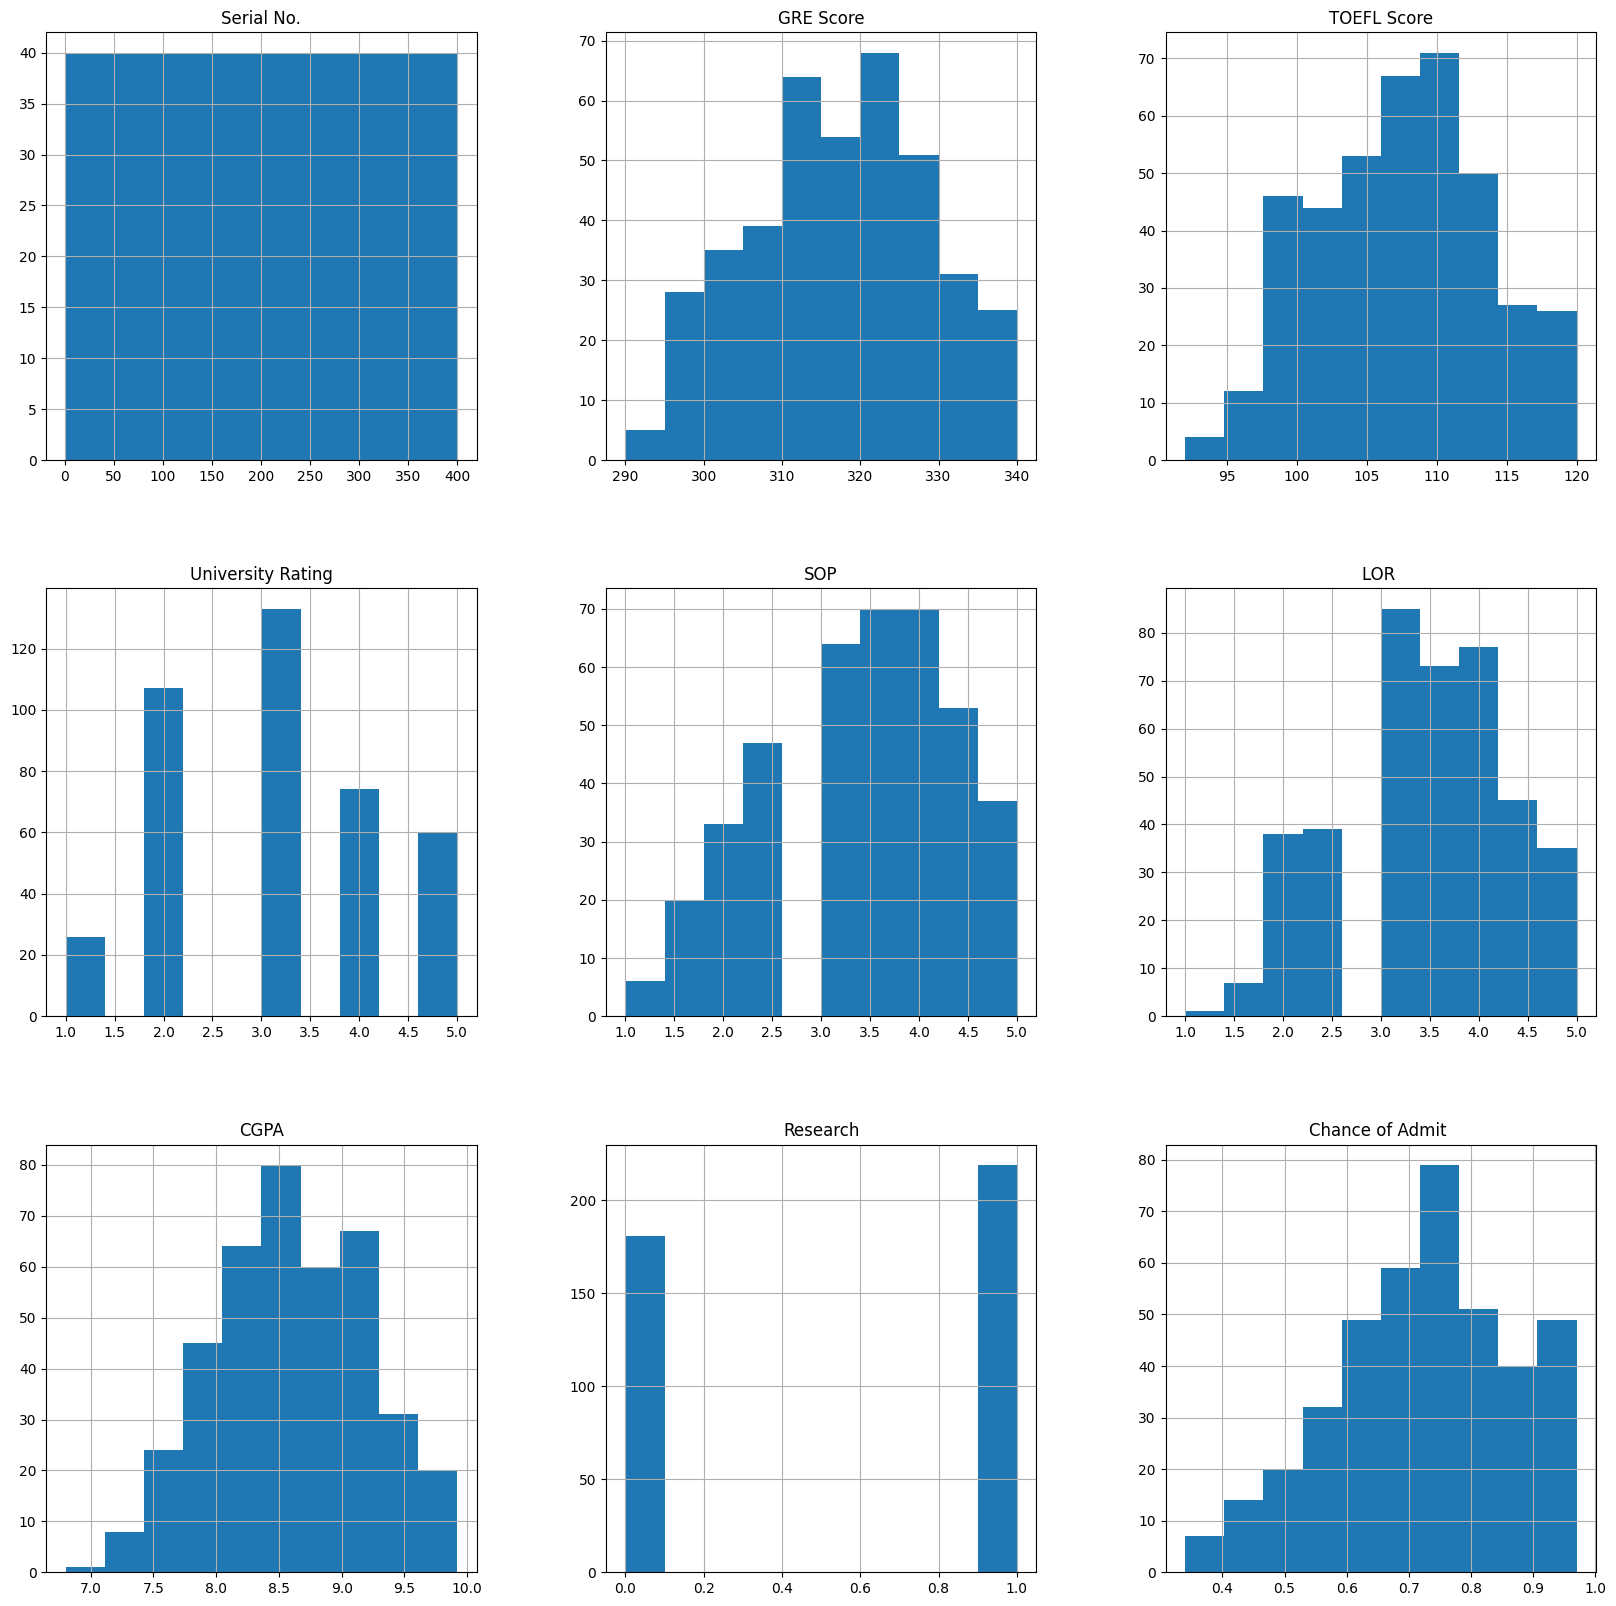

In [12]:
df.hist(figsize=(20,20))
plt.show()

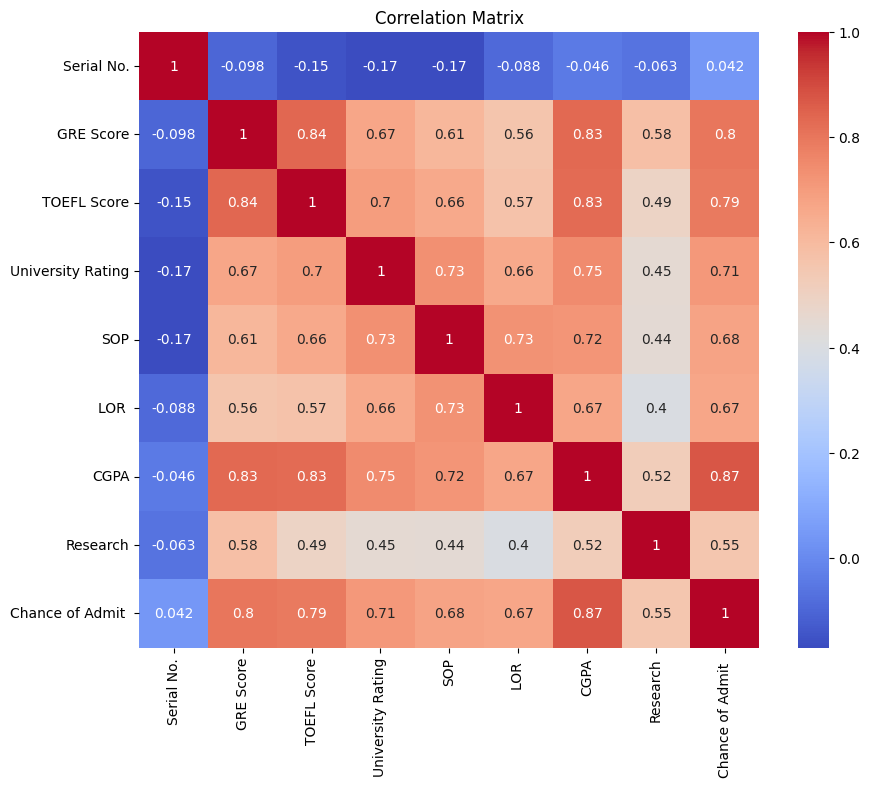

In [13]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


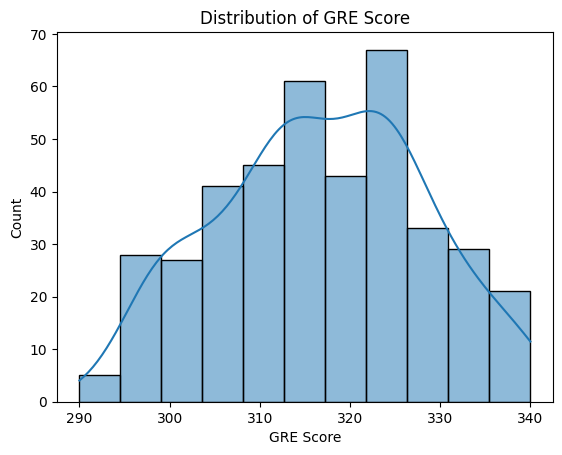

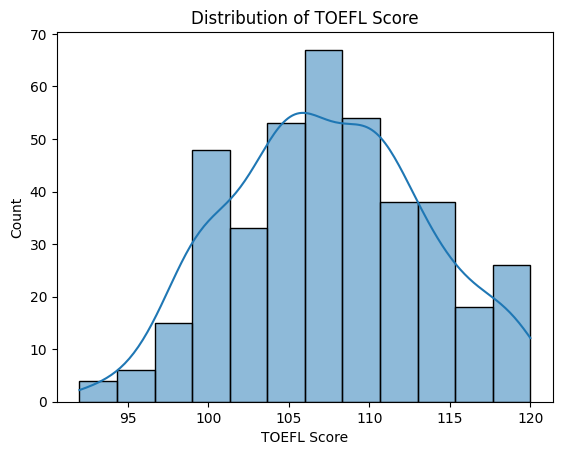

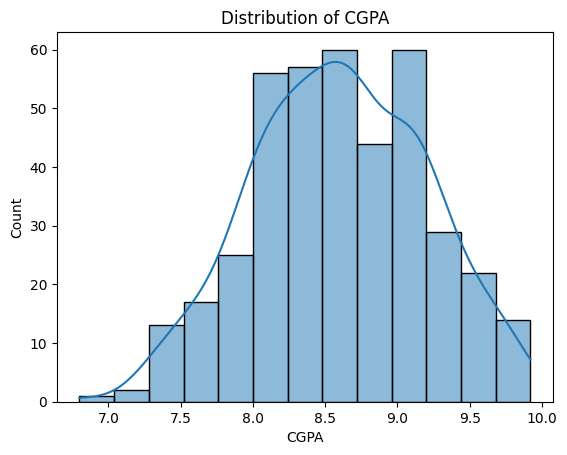

In [14]:
numeric_features = ["GRE Score", "TOEFL Score", "CGPA"]
for feature in numeric_features:
    plt.figure()
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

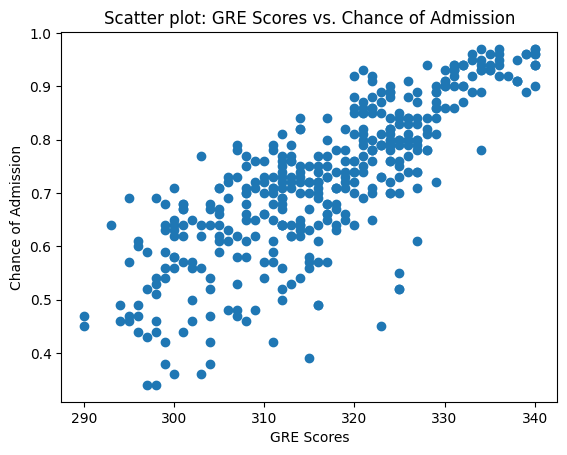

In [15]:
plt.scatter(df["GRE Score"], df["Chance of Admit "])
plt.xlabel("GRE Scores")
plt.ylabel("Chance of Admission")
plt.title("Scatter plot: GRE Scores vs. Chance of Admission")
plt.show()

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit '>

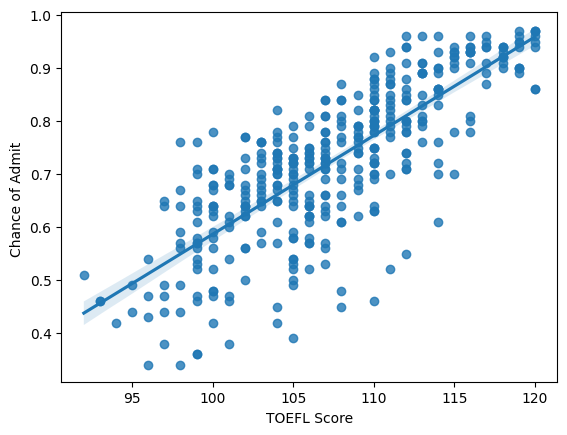

In [16]:
sns.regplot(x="TOEFL Score",y="Chance of Admit ",data=df)

<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

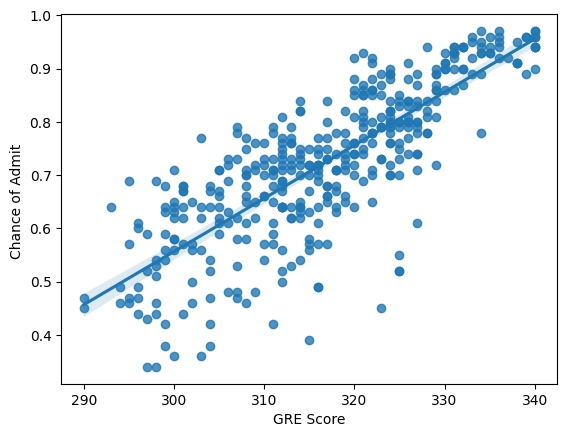

In [17]:
sns.regplot(x="GRE Score",y="Chance of Admit ",data=df)

TRAINING AND TESTING DATA

In [21]:
x = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                     test_size = 0.3, random_state = 30)
 

LINEAR REGRESSION

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred = lin_reg.predict(x_test)


In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)

0.004819103134546471

In [38]:
model = LinearRegression()
model.fit(x_test, y_test)
model.score(x_test, y_test)*100

82.72156049366394